# CONVOLUTIONAL NEURAL NETWORK

In [1]:
import numpy as np 
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg




### Upload train set

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255) # rescale the images (pixel number from 255 to -1<0<1)

training_set = train_datagen.flow_from_directory(
    'Dataset/train',
    target_size=(64, 64),       # pixel size of the image
    batch_size=32,              # how many pictures in the batch
    color_mode= "grayscale",    # black-white scale (default is rbg)
    class_mode='binary',
    shuffle=True,
    seed=69)        # binary classification

Found 4733 images belonging to 2 classes.


### Upload test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = train_datagen.flow_from_directory(
    'Dataset/test',
    target_size=(64, 64),
    batch_size=32,
    color_mode= "grayscale",
    class_mode='binary',
    shuffle=True,
    seed=69)

Found 1184 images belonging to 2 classes.


### Image shape

In [4]:
import numpy as np

# Fetch a batch of images
images, labels = next(training_set)

# Check the shape of the first image in the batch
image_shape = images[0].shape

image_shape


(64, 64, 1)

In [5]:
training_set

### Plot 3 images

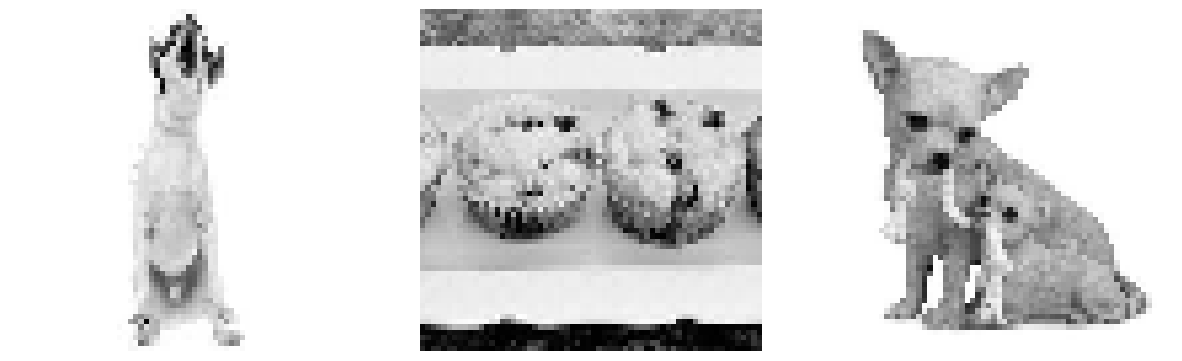

In [7]:
import matplotlib.pyplot as plt

# Get a batch of images from the training set
images, labels = next(training_set)

# Display three random images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    random_index = np.random.randint(0, len(images))
    ax[i].imshow(images[random_index], cmap = 'gray')
    ax[i].axis('off')

plt.show()


## CNN baseline

In [12]:
cnn_base = Sequential()     # initialize model

# Convolution layer
cnn_base.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    input_shape = image_shape))
cnn_base.add(Activation('relu'))
cnn_base.add(MaxPooling2D(pool_size= (3,3)))

# Dense layer
cnn_base.add(Flatten())
cnn_base.add(Dense(units=32, 
                   activation='relu'))

# Output layer
cnn_base.add(Dense(units=1,
                   activation='sigmoid'))


In [13]:
cnn_base.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 32)                409632    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                      

In [83]:
cnn_base.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


### Early stop definition

In [8]:
stop_early = [keras.callbacks.EarlyStopping(monitor="val_loss", 
                                            patience = 5)]

In [84]:
prev_models = cnn_base.fit(x = training_set,
						validation_data = test_set,
						epochs = 25,
						callbacks = stop_early)

Epoch 1/25
148/148 [==============================] - 152s 1s/step - loss: 0.6973 - accuracy: 0.5316 - val_loss: 0.6471 - val_accuracy: 0.5405
Epoch 2/25
148/148 [==============================] - 50s 335ms/step - loss: 0.6382 - accuracy: 0.6024 - val_loss: 0.5853 - val_accuracy: 0.7416
Epoch 3/25
148/148 [==============================] - 49s 329ms/step - loss: 0.5757 - accuracy: 0.7336 - val_loss: 0.5502 - val_accuracy: 0.7373
Epoch 4/25
148/148 [==============================] - 46s 313ms/step - loss: 0.5429 - accuracy: 0.7653 - val_loss: 0.5230 - val_accuracy: 0.7686
Epoch 5/25
148/148 [==============================] - 47s 319ms/step - loss: 0.5215 - accuracy: 0.7750 - val_loss: 0.5079 - val_accuracy: 0.7880
Epoch 6/25
148/148 [==============================] - 49s 334ms/step - loss: 0.4995 - accuracy: 0.7853 - val_loss: 0.5044 - val_accuracy: 0.7762
Epoch 7/25
148/148 [==============================] - 46s 314ms/step - loss: 0.4906 - accuracy: 0.7881 - val_loss: 0.4921 - val_accu

### Plotting function

In [9]:
def plot_result(prev_models):
  result = prev_models.history
  epochs = range(len(result["accuracy"]))

  img_accuracy = plt.figure()
  plt.plot(epochs, result["accuracy"], label="Training")
  plt.plot(epochs, result["val_accuracy"], label="Validation")
  plt.title("Accuracy")
  plt.legend()

  img_loss = plt.figure()
  plt.plot(epochs, result['loss'], label="Training")
  plt.plot(epochs, result['val_loss'], label="Validation")
  plt.title("Loss")
  plt.legend()

  return img_accuracy, img_loss

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

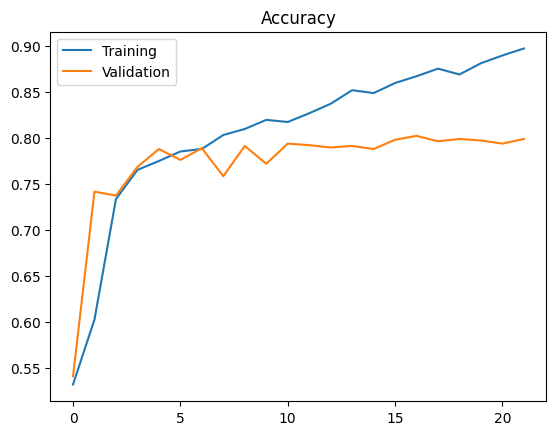

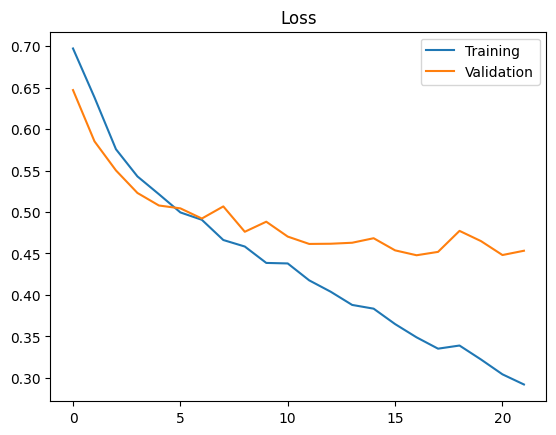

In [86]:
plot_result(prev_models)

## First Model

In [25]:
cnn1 = Sequential()

# Convolution 1
cnn1.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                input_shape = image_shape))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.2))

# Convolution 2
cnn1.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2), padding='same'))
cnn1.add(Dropout(0.3))

# Convolution 3
cnn1.add(Conv2D(filters=64,
                kernel_size=(5,5),
                activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.4))


# Dense layer
cnn1.add(Flatten())
cnn1.add(Dense(units=128,
               activation='relu'))
cnn1.add(Dropout(0.5))


# Output layer
cnn1.add(Flatten())
cnn1.add(Dense(units=1,
               activation='sigmoid'))

In [26]:
cnn1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 31, 31, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 15, 15, 64)       

In [27]:
cnn1.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [28]:
prev_models = cnn1.fit(x = training_set,
                           validation_data = test_set,
                           epochs = 18,
                           callbacks = stop_early)

Epoch 1/30
148/148 [==============================] - 76s 497ms/step - loss: 0.6475 - accuracy: 0.6083 - val_loss: 0.5761 - val_accuracy: 0.7035
Epoch 2/30
148/148 [==============================] - 72s 486ms/step - loss: 0.5179 - accuracy: 0.7528 - val_loss: 0.5414 - val_accuracy: 0.7204
Epoch 3/30
148/148 [==============================] - 76s 511ms/step - loss: 0.4750 - accuracy: 0.7868 - val_loss: 0.5070 - val_accuracy: 0.7525
Epoch 4/30
148/148 [==============================] - 73s 495ms/step - loss: 0.4465 - accuracy: 0.8005 - val_loss: 0.5193 - val_accuracy: 0.7610
Epoch 5/30
148/148 [==============================] - 72s 488ms/step - loss: 0.4218 - accuracy: 0.8185 - val_loss: 0.4075 - val_accuracy: 0.8125
Epoch 6/30
148/148 [==============================] - 73s 491ms/step - loss: 0.3858 - accuracy: 0.8297 - val_loss: 0.3921 - val_accuracy: 0.8285
Epoch 7/30
148/148 [==============================] - 70s 475ms/step - loss: 0.3652 - accuracy: 0.8360 - val_loss: 0.4616 - val_ac

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

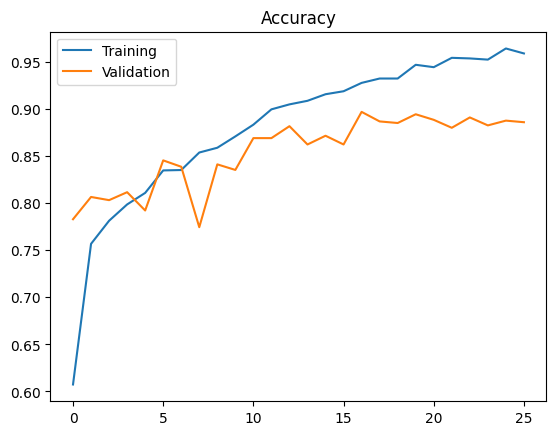

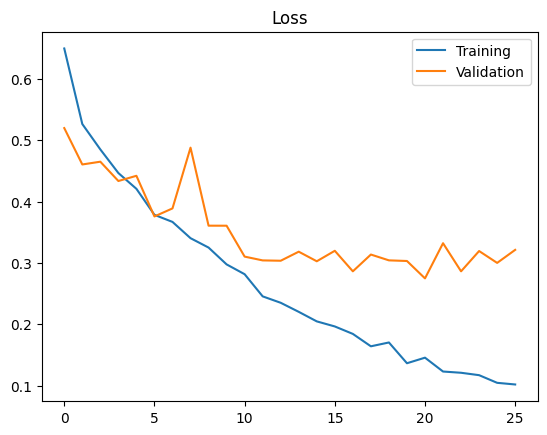

In [19]:
plot_result(prev_models)